# Introduction
The goal of the Biodiversity project is to analyze the data from the National Parks Servie, particularly around those species observed in different naional parks. 

This project will scope, analyze, prepare, plot some of the dta, and hopefully explain the findings of this analysis. 

Here are some of the questions this projects hopes to answer:

What is the distribution of conservation status for species?

Are certain types of species more likely to be endangered?

Are the differences between species and their conservation status significant?

Which animal is most prevalent and what is their distribution amongst parks?

#Data soures:
Both Observations.csv and Species_info.csv was provided by Codecademy.com
Note: The data for this project was inspired by real data, but this dats is mostly ficitonal.

  # Scoping
  
It is always good practice to inspect and find the entire scope of a project before getting started. In general, a project has five parts, which I chose to implement in this project. They are: Project Goals, Inspect Data, Analyze Data, Evaluate Data and Come to a Conclusion (with limitations).


# Project Goals
In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

What is the distribution of conservation status for species?
Are certain types of species more likely to be endangered?
Are the differences between species and their conservation status significant?
Which animal is most prevalent and what is their distribution amongst parks?

# Data
Two csv data sets were included with this project. Species.csv has information regarding species. Observations.csv has observations about those species within park loations. The data is used to help analyze the data to best meet the goals of the project.

# Analysis
In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include:

Distributions
counts
relationship between species
conservation status of species
observations of species in parks.

# Evaluations/Conclusions
Finally, it is always best practice to revisit our goals and determine if the results of our analysis correspond to and/or answer our guiding questions. This last section is created to refelct what we learned in the process of analysis, and if any of those guiding questions remain unanswered. This section also might include limits to any conclusion(s), or even the revelation that a different method of analysis that could have been used to answer those guiding questions.

# Import Python Modules
Our first step is to always import those primary modules that will be used to help in this project

In [10]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Load Data
In order to properly analyze the data and answer any of the guiding questions, listed above, we must first load the datasets into DataFrames. Once done, the data can be explored, analyzed, and visualized with Python. 

In the following stpes, the datasets, Observations.csv and Species_info.csv are read into DataFrames named observations and species, respectivelyl. Those new DataFrames are glimpsed using .head() to check the first 5 rows of its contents. 

# Species
The species_info.csv contains information on the different species in the National Parks. The columns in the data set include:

category - The category of taxonomy for each species

scientific_name - The scientific name of each species

common_names - The common names of each species

conservation_status - The species conservation status

In [18]:
species = pd.read_csv('species_info.csv',encoding='utf-8')
species.head(10)
species.count()


category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64

# Observations
The observations.csv contains informaiton from recorded sightings of different species thourghout the national parks system in the past seven days. This columns included are:

scientific_name - The scientific name of each species

park_name - The name of the national park

observations - The number of observations in the past 7 days

In [36]:
observations = pd.read_csv('observations.csv', encoding = 'utf_8')
observations.head(10)
#observations.count()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


Data Characteristics - number of rows and columns

Next, there will be a check for the dimensions of both data sets, for species, there are 5,824 rows and 4 columns while observations has 23.296 rows with only 3 columns.

In [50]:
print(f"The species file has {species.shape[0]} rows, and {species.shape[1]} columns.")
print(f"The observations file has {observations.shape[0]} rows, and {observations.shape[1]} columns.")

The species file has 5824 rows, and 4 columns.
The observations file has 23296 rows, and 3 columns.


# Explore the Data

Now we explore the species data file with more depth. Initially, we want to determine the unique species in the data. We use the column scientific_name to get the number of unique species (5,541). 

In [51]:
print(f"There are {species.scientific_name.nunique()} species in the datafile.")

There are 5541 species in the datafile.


Next we need to find the number of category that are represented in the data and we find 7 including animals and plants. 

In [53]:
print(f"There are {species.category.nunique()} categories of species in the datafile.")
print(f"Those categories are:{species.category.unique()}")

There are 7 categories of species in the datafile.
Those categories are:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


We need to drill deeper in order to see the count of category in the data. Vascular plants hold the lion-share of the species with 4,470 in the data file, with reptiles being the fewest with only 79.

In [55]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Another column to explore is convservation_status. The column has 4 categories, Species of Concern, Endangered, Threatened, In Recovery, and of course those pesky nan values. 

In [57]:
print(f"There are {species.conservation_status.nunique()} conservation statuses.")
print(f"Those unique conservation statuses are: {species.conservation_status.unique()}")

There are 4 conservation statuses.
Those unique conservation statuses are: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


A count of the number of observations in the breakdown of categories in conservation_status is done. We found 5633 nan values which means that those are species without concerns. On the other hand, there are 161 species of concerns. Conversely, ther are 161 species OF concern, 16 which are endangered, 10 which are threatened, and 4 in recover.

Note: The majority of cases resulting in nan values must be treated carefully, but the absence of data here means that theese are species not under any conservations status. 

In [29]:
print(f"na values:{species.conservation_status.isna().sum()}")

print(species.groupby("conservation_status").size())

na values:5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


# Observations
The next sections looks at observations data. the first task is to check the numer of parkes that are in the dataset, and there are only 4 National Parks. 

In [58]:
print(f"There are {observations.park_name.nunique()} National Parks.")
print(f"Those National Parks are: {observations.park_name.unique()}")

There are 4 National Parks.
Those National Parks are: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Here are the total number of observations loggede in the parks: there are 3,314,739 sightings just in the last 7 days!!!

In [59]:
print(f"The total number of observations in the past 7 days is {observations.observations.sum()}.")

The total number of observations in the past 7 days is 3314739.


# Analysis

In this section, we will start analyzing data. After the initial exploration, the first task is to clean and explore the conservation_status column in the species file. 

The column conservation_status has several possible values, which are:

Species of Concern: declining or appear to be in need of concentrated conservation actions, but there is insufficient information available to list them under the Endangered Species Act

Threatened: these species (animal and plant) which are vulnerable to extinction in the near future. The qunatitative metric to evaluate this degree of endangerment includes population dynamics measure of critical depensation, which is a mathematical measure of biomass related to the population growth rate. 

Endangered: a species which is very likely to become extinct in the near future, either worldwide or in a particular political jurisdiction. Factors making species endangered are habitat loss, poaching, as well as an invasive species.

In Recovery: the species was formerly Endangered, but are currently not in danger of extinction throughout all or in a significant portion of its range

In this exploration, a lot of NAN values were encountered, which we will convert into 'No Intervention'.

In [60]:
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()


conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Lets explore the different categories nested inside the 'conservation_status' column except for the ones that require no intervetion. There is both a table and chart to explore below.

For those in the 'Endangered' status, 7 were mammals and 4 were birds. In the 'In Recovery' status, 3 were birds and 1 was mammal, which could possibly mean that the birds recovering more than the mammals are.

In [65]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0.5, 1.0, 'Number of Species per Conservation Status')

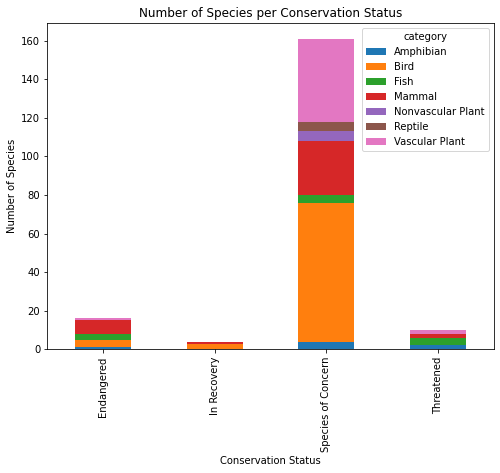

In [67]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6),stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
ax.set_title("Number of Species per Conservation Status")

# In Conservation
The next guiding question of this project is if certain types of species are most likely to be endangered? This question can be answered by creating a new column called is_protected and includes any species that had a value other than No Intervention. Once we have done this, we print out the total number of protected species shown in this data file.

In [70]:
species['is_protected'] = species.conservation_status != 'No Intervention'
print("The total number of protected species is ", species.is_protected.sum(), ".")

The total number of protected species is  191 .


Once the new column is created, we group by category and is_protected to break down each species type and protected status. 

It's clear that Birds, Vascular Plants, and Mammals have higher numbers of protected species.

In [73]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Absolute numbers are not always the most useful statistic, so it's important to calculate the rate of protection that each category exhibits in the data. From the analysis, we see that approximately 17% of mammals were protected, around 15% of birds, nearly 9% in both Amphibians and Fish, and just over 6% for reptiles. Vascular and Non-Vascular plants both show between 1% and 2%.

In [75]:
category_counts['percent_protected']= category_counts.protected/\
                                      (category_counts.protected + category_counts.not_protected) * 100
category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


# Statistical Significance
Running a chi-squared test in this section to see if the different species may have statictically significant differences in conservation status rates. To run a chi-squared test, a congtingency table will need to be created. 

The first test we will call contingency1 and will be populated with the correct numbers for MAMMALS and BIRDS. 

The results from the chi-squared test returns a lot of values, the second value which is 0.69 is the p-value. The standard p-value to test statistical significance is 0.05. for the value retrieved from this test, the value of 0.69 is much larger than 0.05. In the case of mammals and birds, there doesn't seem to be any significant relationship between them (i.e. the variables are independent of one another)

In [76]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)


(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

Next, we test the difference between REPTILE and MAMMAL.

This time the p-value is 0.039 which is below the standard threshold of 0.05, meaning that the difference between reptiles and mammals is statitically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared to Reptiles.

In [77]:
contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

# Species in Parks
The next analysis is data coming from the conservationists as they have been recording sightings of different splecies at several national parks for the past seven days. 

Our first step is to look at the common names for species to get an idea of the most prevalant animals in the dataset. The data is split by their individual names.


In [78]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Now we clean up the data so there are not dupliate words in each row 

In [82]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)

cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Next, the words need to be collapsed into one list


In [83]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

This data is ready to be able to count the number of observation occurances of each word. From this analysis, it seems that BAT occured 23 times t while Shrew occurred to me 18 times. 

In [84]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
116,Bat,23
82,Shrew,18
102,Myotis,17
166,Mouse,16
94,Chipmunk,13
137,Squirrel,12
92,American,12
113,Eastern,11
34,Vole,11
132,Mountain,10


Several differnet scientific names for different typoes of bats occur in the data. The next task is to determine which rows of species are referring to bats. A new colulmn of boolean type will check if is_bat is True

In [86]:
species['is_bat']=species.common_names.str.contains(r"\bBat\b", regex = True)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


This subset shows that where the data 'is_bat' is true, which returns the rows that matched. There seems to be a lot of species of bats as well as a mix of protected vs not-protected species.

In [87]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


We want to merge the bat species with observations to craete a new DataFrame with obeservations of bats across the National Parks in this study. 

In [88]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


Let's calculate the total bat observations(all species) made at each National Park.

The total number of bats observed in each park of the past seven days are in a table below. Yellowtone National Park seems to have the largest with 8,32 observations and the Great Smoky Mountains Naitonal Park having the lowest with 2,411.


In [89]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Now let's break down each park into protected bats vs. non-protected bats. It seems every park except for the Great Smoky Mountains National park has more sightings of protected bats than not.  This could be considered a great sign for bats.

In [90]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


The plot below shows the last data manipulation. From the chart one can see that Yellowstone and Bryce National Parks seem to be doing a great with their bat population. It seems that there are more sightings of protected bats compared to non-protected species. The Great Smoky Mountains National Park needs to improve their conservation efforts as the observers have seen more of the non-protected species.

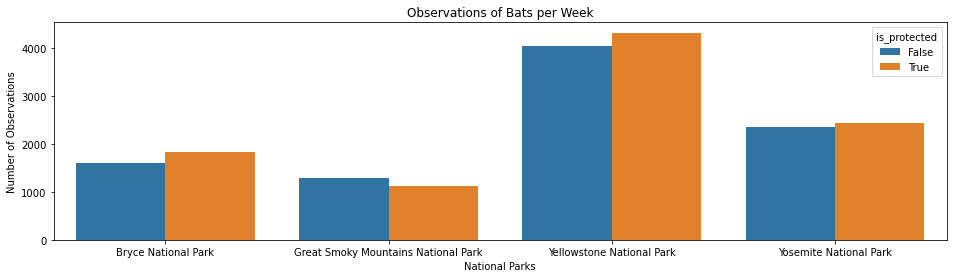

In [91]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

# Conclusion

We were able to make some good data visualizations and inferences about the various species in four of the National Parks that compromised the data set. 

This project was also able to answer some of the guiding questions posed in the beginning of the study. 

    - What is the distribution of conservation status for all species?
    
            -The vast majority of species were not part of conservation.(5,633 vs 191)
            
    - Are certain types of species more likely to be endangered?
    
            - Mammals and Birds had the highest percentage of being in protection.
            
    - Are the differences between species and their conservation status significant?
    
            - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles                     exhibited a statistically significant difference.
            
    - Which animal is most prevalent and what is their distribution amongst parks?
    
            - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone  National Park.

# Limitations to the Analysis

Like any study or experiment, there are always limitations. One of the biggest obstacles to the data is that it was only observations in the past 7 days. Having more data from a greater period of time would likely prove to change the conservation status over the course of time. Another limitation is the fact that only 4 of the Naitonal Parks had data collected. If Carlsbad Caverns and Mount Rushmore had been included, there would likely be a lot more bat species included in this study, which may have changed the analysis substantially. Taking into account the size of Yellowstone compared to the other parks studied, I believe it would provide substantially more observations, as well as a diverse set of species. 